![SNAR](https://pbs.twimg.com/media/FgYncfOXgAQcWXj?format=jpg&name=medium)

#### In this projects: 
    1. Power law in the real data - case study  
    2. Nearest neighbors degree in practice  
    3. Correlation coefficient in practice  
    4. What real networks are?  
    5. Erdős numer – empirical data  
    
![SNAR](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Libraries </font>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import powerlaw as po
from scipy.io import mmread
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise 1 </font>
Import the data, draw their histogram.

#### road chesapeake dataset
This network dataset is in the category of Road Networks <br>
https://networkrepository.com/road-chesapeake.php

In [2]:
from scipy.io import mmread
G = mmread('road-chesapeake.mtx')
G = G.todense()
G = np.matrix(G)
G=nx.Graph(G)

In [3]:
deg=nx.degree_histogram(G)
d=np.concatenate([np.array([i]*deg[i],dtype="int") for i in range(len(deg))])

<AxesSubplot:ylabel='Count'>

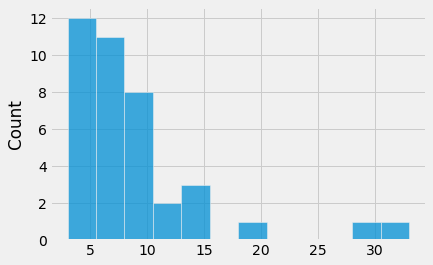

In [4]:
sns.histplot(x=d)

## <font color = #41EA46> Excercise 2, 3 </font>
* Correct the scale of the plot’s axes to double logarithmic.
* Apply logarithmic binning as well.

<AxesSubplot:ylabel='Count'>

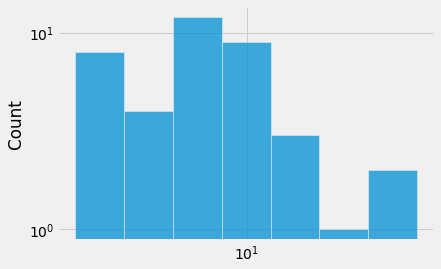

In [5]:
sns.histplot(x=d,log_scale=(True,True))

## <font color = #41EA46> Excercise 4,5
* Compute and draw the survival function.
* Which chart is the most readable? Which is most robust for the noise?

In [6]:
surv=(np.sum(deg)-np.cumsum(np.array(deg)))/np.sum(deg)

In [7]:
X=np.linspace(1,len(deg),len(deg),dtype="int")

In [8]:
np.log(surv[:-1])

array([ 0.        ,  0.        ,  0.        , -0.02597549, -0.22957444,
       -0.36772478, -0.52806743, -0.89097292, -0.95551145, -1.36097655,
       -1.5841201 , -1.87180218, -1.87180218, -2.27726729, -2.27726729,
       -2.56494936, -2.56494936, -2.56494936, -2.97041447, -2.97041447,
       -2.97041447, -2.97041447, -2.97041447, -2.97041447, -2.97041447,
       -2.97041447, -2.97041447, -2.97041447, -2.97041447, -3.66356165,
       -3.66356165, -3.66356165, -3.66356165])

<AxesSubplot:>

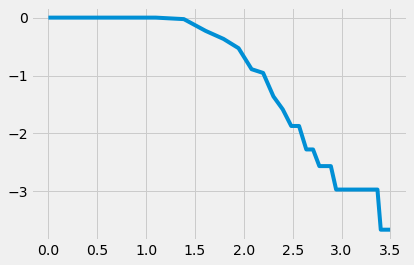

In [9]:
sns.lineplot(x=np.log(X[:-1]),y=np.log(surv[:-1]))

<AxesSubplot:>

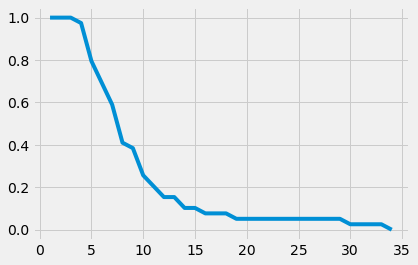

In [10]:
sns.lineplot(x=X,y=surv)

survival plot show us percentages better

## <font color = #41EA46> Excercise 6
Use the linear regression to the previous plots to determine the parameter α estimator

In [11]:
reg = LinearRegression().fit(np.log(X[:-1]).reshape(-1, 1),np.log(surv[:-1]))

In [12]:
reg.coef_[0]*-1

1.3561493406414475

<AxesSubplot:>

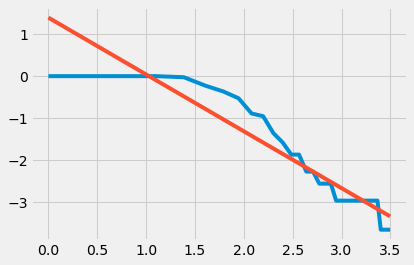

In [13]:
sns.lineplot(x=np.log(X[:-1]),y=np.log(surv[:-1]))
sns.lineplot(x=np.log(X[:-1]),y=reg.predict(np.log(X[:-1]).reshape(-1, 1)))

## <font color = #41EA46> Excercise 7,8
* Compute (formula and value for our data) MLE estimator for α with a known xmin assuming following distribution
* How will the result change if we do not know xmin?

In [14]:
1+len(d)*1/np.sum(np.log(d/np.min(d)))

2.1066465849598455

In [15]:
fit=po.Fit(d)

Calculating best minimal value for power law fit


In [16]:
fit.alphas[0]

2.1066465849598455

We can get smaller or bigger alpha

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.1
Collect obtained scripts for power distribution analysis in one ﬁle. We will use them again and again.

In [17]:
def get_alpha(G):
    deg=nx.degree_histogram(G)
    d=np.concatenate([np.array([i]*deg[i],dtype="int") for i in range(len(deg))])
    return 1+len(d)*1/np.sum(np.log(d/np.min(d)))

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.2
Prove that for uncorrelated network $⟨k⟩_{nn} (k_i ) =⟨k^2 ⟩/⟨k⟩$

for uncorrelated networks $e_{ij} =q_i q_j $

$P(k'|k)=\frac{e_{kk'}}{\sum_{k'}{e_{kk'}}}= \frac{e_{kk'}}{q_k}=\frac{q_{k'} q_k}{q_k}=q_{k'}$

$q_k=\frac{k p_k}{⟨k⟩}$

$⟨k⟩_{nn} (k_i ) = \sum_{k'}{k' P(k'|k_i)} = \sum_{k'}{k' q_{k'}} = \sum_{k'}{k' \frac{k p_k}{⟨k⟩}} = ⟨k^2 ⟩/⟨k⟩$

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.3
Determine the dependence of the average degree of the nearest neighbor on the degree of the vertex for selected real or artiﬁcal networks.

In [18]:
nx.degree_pearson_correlation_coefficient(G)

-0.3757827510643474

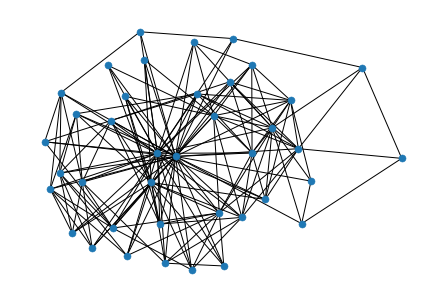

In [19]:
positions_G = nx.kamada_kawai_layout(G)
nx.draw(G,pos=positions_G,node_size=50)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.4
Check how random edge switching affects the result of the previous task.

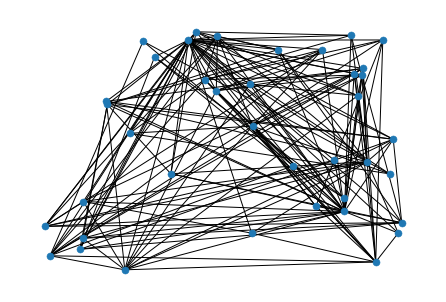

In [21]:
positions_G = nx.random_layout(G)
nx.draw(G,pos=positions_G,node_size=50)      # XXXXXX

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.6
Find the correlation coefﬁcient for the network from task P3.4(before and after edge switching).

In [23]:
G_switch=G.copy()
nx.double_edge_swap(G_switch, nswap=10, seed=123)

In [24]:
nx.degree_pearson_correlation_coefficient(G_switch)

-0.3175194783464806

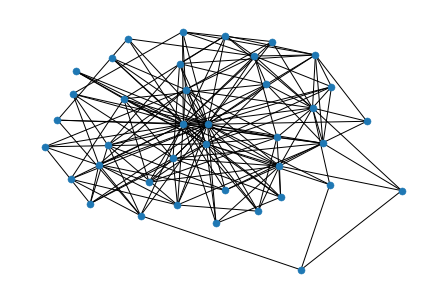

In [25]:
positions_G = nx.kamada_kawai_layout(G_switch)
nx.draw(G_switch,pos=positions_G,node_size=50)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.7
Let’s ﬁl the above table with metrics od selected real networks, use the built-in functions for counting the parameters. Compare the results with the literature.

In [26]:
table=pd.DataFrame(columns=["name","is_directed","N","E","<k>","alpha","l","r"])

In [27]:
name='road-chesapeake.mtx'
G = mmread(name)
G = G.todense()
G = np.matrix(G)
G = nx.Graph(G)

table=table.append({"name":name,"is_directed":False,"N":len(G.nodes()),"E":len(G.edges()),"<k>":2*len(G.edges())/len(G.nodes()),"alpha":get_alpha(G),"l":len(nx.degree_histogram(G)),"r":nx.degree_pearson_correlation_coefficient(G)},ignore_index=True)

In [107]:
name='ca-netscience.mtx'
G = mmread(name)
G = G.todense()
G = np.matrix(G)
G = nx.Graph(G)

table=table.append({"name":name,"is_directed":False,"N":len(G.nodes()),"E":len(G.edges()),"<k>":2*len(G.edges())/len(G.nodes()),"alpha":get_alpha(G),"l":len(nx.degree_histogram(G)),"r":nx.degree_pearson_correlation_coefficient(G)},ignore_index=True)

In [108]:
name='power-494-bus.mtx'
G = mmread(name)
G = G.todense()
G = np.matrix(G)
G = nx.Graph(G)

table=table.append({"name":name,"is_directed":False,"N":len(G.nodes()),"E":len(G.edges()),"<k>":2*len(G.edges())/len(G.nodes()),"alpha":get_alpha(G),"l":len(nx.degree_histogram(G)),"r":nx.degree_pearson_correlation_coefficient(G)},ignore_index=True)

In [110]:
table

,name,is_directed,N,E,<k>,alpha,l,r
0,ca-netscience.mtx,False,379,914,4.823219,1.748166,35,-0.081678
1,power-494-bus.mtx,False,494,1080,4.372470,4.009791,12,0.196736
2,road-chesapeake.mtx,False,39,170,8.717949,2.106647,34,-0.375783


![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.8
Analyse the data on the ENP website. Draw histograms of the Erdős number for the Nobel prize and the Fields medal laureates.

<AxesSubplot:ylabel='Count'>

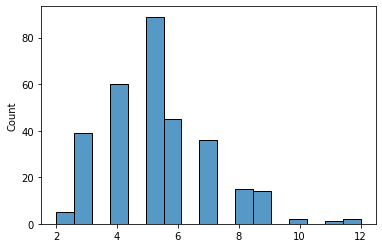

In [169]:
nobel=pd.read_csv("nobel_erdos",sep="\t")

nobel=nobel["ERDOS NUMBER"].to_numpy().astype("int")

sns.histplot(x=nobel)

<AxesSubplot:ylabel='Count'>

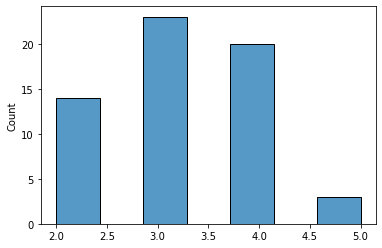

In [170]:
fields=pd.read_csv("fields_erdos",sep="\t")

fields=fields["ERDOS NUMBER"].to_numpy().astype("int")

sns.histplot(x=fields)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P4.9
Check the Bacon number of selected actors. Draw a histogram of Bacon number among Oscar winners. Who will ﬁnd the actor with the highest Bacon number?

In [22]:
import json

In [23]:
from networkx.readwrite import json_graph

In [44]:
f= open('actors.json')
xd=f.read()
f.close()

xd=xd.replace("[[","").replace("]]","")

f= open('actors_clean.json',"w")
f.write(xd)
f.close()

In [46]:
movies=[]
with open('actors_clean.json') as f:
    i=0
    for line in f:
        i+=1
        if i%1000==0:
            print(i*100/146750)
            j_content = json.loads(line)
            L=[x for x in j_content["cast"]]
            Temp=nx.complete_graph(len(L))
            nx.relabel_nodes(Temp,dict(enumerate(L)), copy = False)
            movies.append(Temp.copy())

In [47]:
for i in range(100):
    print(i)
    Actors=nx.compose_all(movies[i::100])
    nx.write_graphml_lxml(Actors, "actors/actors{}.graphml".format(i))

In [4]:
for i in range(100):
    print(i)
    Temp=nx.read_graphml("actors/actors{}.graphml".format(i))
    actors.append(Temp.copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [5]:
%time Actors=nx.compose_all(actors)

nx.write_graphml_lxml(Actors, "actors_All.graphml")

CPU times: user 25min 23s, sys: 29.2 s, total: 25min 52s
Wall time: 25min 52s


In [2]:
import igraph as ig

In [3]:
Actors=nx.read_graphml("actors_All.graphml")

In [9]:
Actors.vs["name"]=Actors.vs["id"]

In [10]:
Bacon=Actors.get_shortest_paths(v="Kevin Bacon")

<ipython-input-10-07415e2f694d>:1: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:367
  Bacon=Actors.get_shortest_paths(v="Kevin Bacon")


In [31]:
Shortest=[len(x) for x in Bacon]

In [4]:
Actors=ig.read("actors_All.graphml")

In [40]:
Actors.vs["name"].index('Anna Lizaran')

2

In [32]:
Oscars=pd.read_csv("Oscar",header=None,sep="\t")

In [33]:
Oscars=Oscars.to_numpy().reshape(-1)

In [44]:
Oskar_ind=[Actors.vs["name"].index(os) for os in Oscars if os in Actors.vs["name"]]

In [ ]:
Bacon

In [48]:
Shortest=np.array(Shortest)

In [49]:
Shortest[Oskar_ind]

array([4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3])

<AxesSubplot:ylabel='Count'>

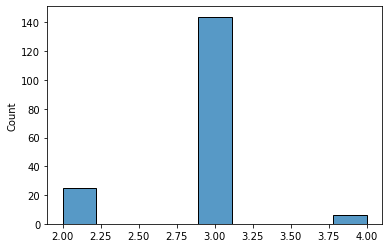

In [50]:
sns.histplot(x=Shortest[Oskar_ind])

![SNAR](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)